In [1]:
import collections
from collections import OrderedDict
from matplotlib import pyplot as plt
from matplotlib import cm
import pylab
import math
import numpy as np

## CGR - Chaos Game Representation

#### The following class has three methods :
  - count kmers : returns a dictionary with the k - mers as key and the number of occurences of k - mers as value
  - probablities : Returns the probablity of the k-mer occuring in the sequence
  - chaos_game_representation : generates FCGR matrix 

In [2]:
class CGR_SeqAlignment:
    def count_kmers(self,sequence, k):        # takes the sequence, k as input
        d = collections.defaultdict(int)      # default dictionary creation
        for i in range(len(sequence)-(k-1)):  
            d[sequence[i:i+k]] +=1            # storing the k-mers along with its occurences
        for key in list(d):                   # removing N values from sequences
            if "N" in key:
                del d[key]
        return d
    
    def probabilities(self,kmer_count, k):              
        probabilities = collections.defaultdict(float)  
        N = len(kmer_count)
        for key, value in kmer_count.items():
            probabilities[key] = float(value) / (N)  # calculating the probablities for each k-mer in dictionary
        return probabilities

    def chaos_game_representation(self,probabilities, k): 
        array_size = int(math.sqrt(4**k))             # FCGR matrix size 
        chaos = []
        for i in range(array_size):
            chaos.append([0]*array_size)              # creating a 2D square matrix of size array_size with zeros

        maxx = array_size
        maxy = array_size
        posx = 0
        posy = 0
        for key, value in probabilities.items():      # finding the grids to which the k-mers belong
            for char in key:
                if char == "T":
                    posx += maxx // 2
                elif char == "C":
                    posy += maxy // 2
                elif char == "G":
                    posx += maxx // 2
                    posy += maxy // 2
                maxx = maxx // 2
                maxy = maxy//2
            chaos[posy-4][posx-4] = value
            maxx = array_size
            maxy = array_size
            posx = 4
            posy = 4

        return chaos

In [3]:
def CGR_plot(filename,k):                 # function to plot the CGR matrix
    f = open(filename)                    # opening the fasta file 
    s = f.read()                          # reading the file
    data = "".join(s.split("\n")[1:])     # skipping the first line in a fasta file 
    
    cgr = CGR_SeqAlignment()              # object of class CGR_SeqAlignment 
    cgr_kmers = cgr.count_kmers(data,k)   # counting k-mers
    cgr_prob = cgr.probabilities(cgr_kmers, k)                    # finding the probabilities of k - mers
    chaos_mat = cgr.chaos_game_representation(cgr_prob, k)        # getting the CGR matrix 
    str1 = 'Chaos game representation for', k ,'-mers'            # title of the plot 
    pylab.title(str1)
    pylab.imshow(chaos_mat, interpolation='nearest',cmap=cm.Reds) # plotting the chaos_matrix
    plt.gca().invert_yaxis()                   
    plt.colorbar()
    file = filename.replace('fasta','png')
    plt.savefig(file)                                             # saving the image 
    pylab.show()
    return chaos_mat

In [4]:
def CGR_prob_dist(chaos1,chaos2):       # function to find the euclidean distance between two probablity matrix
    dist = np.sqrt(np.sum(np.square(np.array(chaos1) - np.array(chaos2))))
    return dist

In [5]:
import glob
#f = glob.glob("F:\\DNA_SEQ\\*fasta")
f = glob.glob("C:\\Users\\deept\\Desktop\\Sem 4\\Sem4 Projects\\IBS4 Project\\ANIMAL_GENOME\\*.fasta")  # reading all fasta files in folder 

In [6]:
f_names = []                            # list to store the names of the files 
for i in range(0,len(f)):
    ft = f[i]
    f_names.append(ft[ft.rindex("\\")+1:len(ft)])

Gallus.fasta


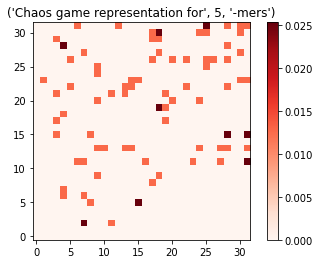

Goat.fasta


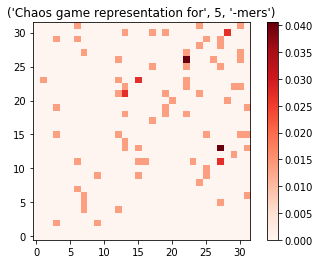

Gorilla.fasta


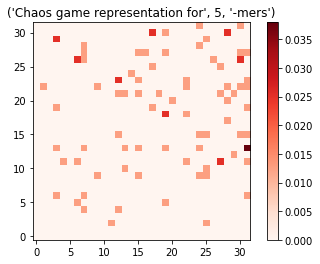

Human.fasta


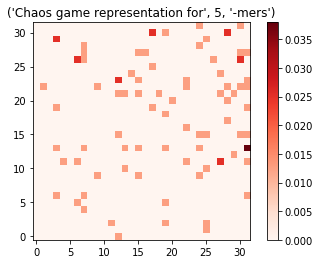

Lemur.fasta


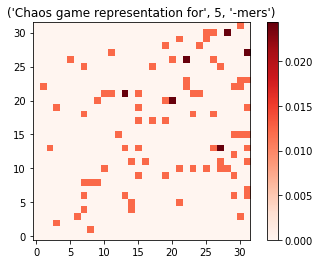

Mouse.fasta


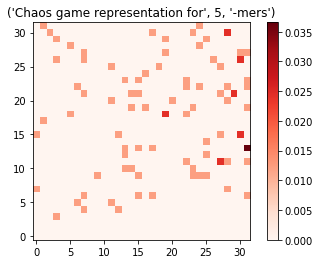

Opossum.fasta


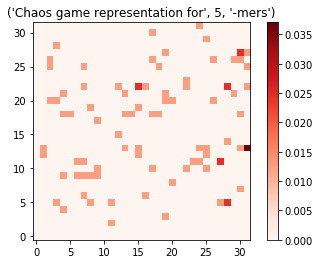

Rabbit.fasta


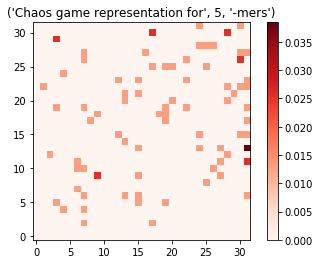

Rat.fasta


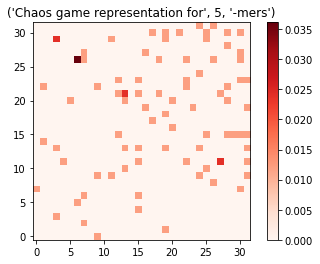

In [7]:
k = 5                                   # k - mer length 
chaos_mat = []
for i in range(0,len(f)):               # for loop to find and plot the CGR mat for all the files in the folder
    f1 = f[i]
    print(f1[f1.rindex('\\')+1:len(f1)])
    chaos_mat.append(CGR_plot(f[i],k))  

In [8]:
dist_cgr = np.zeros((len(f),len(f)))     # dist_cgr list to store the probablity distances

for i in range(0,len(f)):             
    for j in range(0,len(f)):
        if(i!=j):
            dist_cgr[i][j] = round(CGR_prob_dist(chaos_mat[i],chaos_mat[j]),4) 
            

In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame(dist_cgr)
df                              # printing the dataframe 

,0,1,2,3,4,5,6,7,8
0,0.0000,0.1537,0.1596,0.1581,0.1524,0.1639,0.1572,0.1496,0.1459
1,0.1537,0.0000,0.1260,0.1308,0.1279,0.1421,0.1564,0.1317,0.1354
2,0.1596,0.1260,0.0000,0.0420,0.1414,0.1106,0.1443,0.1103,0.1054
3,0.1581,0.1308,0.0420,0.0000,0.1408,0.1180,0.1437,0.1096,0.1046
4,0.1524,0.1279,0.1414,0.1408,0.0000,0.1453,0.1543,0.1395,0.1398
5,0.1639,0.1421,0.1106,0.1180,0.1453,0.0000,0.1410,0.1263,0.1255
6,0.1572,0.1564,0.1443,0.1437,0.1543,0.1410,0.0000,0.1468,0.1470
7,0.1496,0.1317,0.1103,0.1096,0.1395,0.1263,0.1468,0.0000,0.1302
8,0.1459,0.1354,0.1054,0.1046,0.1398,0.1255,0.1470,0.1302,0.0000


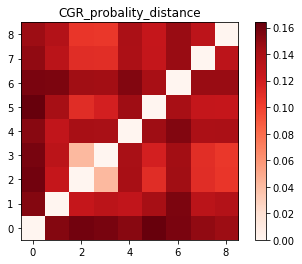

In [11]:
pylab.title("CGR_probality_distance")                        # plotting the probablity distance matrix 
pylab.imshow(dist_cgr, interpolation='nearest',cmap =cm.Reds)
plt.gca().invert_yaxis()
plt.colorbar()
pylab.show()

In [12]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

C:\Users\deept\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


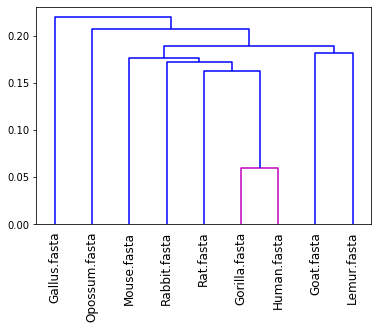

In [13]:
hierarchy.set_link_color_palette(['m', 'g', 'r', 'k'])   
Z = hierarchy.linkage(dist_cgr)
plt.figure()
dn = hierarchy.dendrogram(Z , labels = f_names )   # plotting the relation between the Sequences -  dendrogram plot
plt.xticks(rotation=90)
hierarchy.set_link_color_palette(None) 

### CGR Coordinate Method

In [14]:

x = {'A': 0,'C': 0,'G':1,'T':1}
y = { 'A': 0,'C': 1,'G':1,'T':0}

A = (0,0)
C = (0,1)
G = (1,1)
T = (1,0)

def CGR_coord(s1):   # function to plot the CGR co-ordinate methods 
    CGR_x = [0.5]
    CGR_y = [0.5]
    for s in s1:
        s = s.upper()
        tempx = CGR_x[-1]
        tempy = CGR_y[-1]
        CGR_x.append(tempx - 0.5*(tempx - x[s]))
        CGR_y.append(tempy - 0.5*(tempy - y[s]))
    return CGR_x,CGR_y

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def CGR_coord_plot(CGR_x,CGR_y):      # Function to plot the CGR coordinate vectors 
    n = np.arange(len(CGR_x))

    plt.figure(figsize=(20, 20))
    fig, ax = plt.subplots()
    ax.scatter(CGR_x,CGR_y,color = 'b')

    for i, txt in enumerate(n):
        ax.annotate(txt, (CGR_x[i], CGR_y[i]),fontsize= 15)
    plt.plot(CGR_x,CGR_y, 'g--')

In [17]:
def Dist_CGR_coord(CGR_x1,CGR_x2,CGR_y1,CGR_y2):            # Function to find the euclidean distance between the two CGR coordinates
    l = min(len(CGR_x1),len(CGR_x2))
    X_diff = abs(np.array(CGR_x1[0:l]) - np.array(CGR_x2[0:l]))
    Y_diff = abs(np.array(CGR_y1[0:l]) - np.array(CGR_y2[0:l]))
    return np.sqrt(sum(np.square(X_diff)) + sum(np.square(Y_diff)))

In [18]:
def readf(filename): # Function to read the fasta file 
    f = open(filename)
    s = f.read()
    data = "".join(s.split("\n")[1:])
    return data

In [19]:
dist_cgr_coord = np.zeros((len(f),len(f)))
for i in range(0,len(f)):
    for j in range(0,len(f)):
        if(i!=j):
            CGR_x1,CGR_y1 = CGR_coord(readf(f[i]))
            CGR_x2,CGR_y2 = CGR_coord(readf(f[j]))
            dist_cgr_coord[i][j] = Dist_CGR_coord(CGR_x1,CGR_x2,CGR_y1,CGR_y2)

In [20]:
dist_cgr_coord

array([[0.        , 4.59039496, 3.26765369, 3.38628232, 3.71364438,
        5.07367217, 3.39716628, 5.34677523, 4.96694171],
       [4.59039496, 0.        , 4.62875082, 4.69954545, 4.53748372,
        4.99344879, 4.85684121, 5.18388118, 5.23904269],
       [3.26765369, 4.62875082, 0.        , 0.57735027, 3.46419956,
        5.15472328, 3.25059956, 5.30302875, 5.06159449],
       [3.38628232, 4.69954545, 0.57735027, 0.        , 3.4576623 ,
        5.1747618 , 3.3641769 , 5.29608853, 5.13917295],
       [3.71364438, 4.53748372, 3.46419956, 3.4576623 , 0.        ,
        5.09303567, 3.83249424, 5.08594925, 5.2140089 ],
       [5.07367217, 4.99344879, 5.15472328, 5.1747618 , 5.09303567,
        0.        , 5.23697186, 4.61756347, 4.31118405],
       [3.39716628, 4.85684121, 3.25059956, 3.3641769 , 3.83249424,
        5.23697186, 0.        , 5.39988186, 4.8618182 ],
       [5.34677523, 5.18388118, 5.30302875, 5.29608853, 5.08594925,
        4.61756347, 5.39988186, 0.        , 4.00733119],


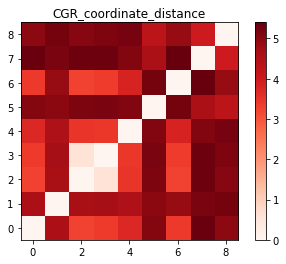

In [21]:
pylab.title("CGR_coordinate_distance")
pylab.imshow(dist_cgr_coord, interpolation='nearest',cmap =cm.Reds)
plt.gca().invert_yaxis()
plt.colorbar()
pylab.show()

In [22]:
max(max(dist_cgr_coord.tolist()))

5.399881857687812